<a href="https://colab.research.google.com/github/BrilliantChard/100-days-of-tensorflow/blob/main/Image_Classification_Simplilearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
print("Happy Coding!")

Happy Coding!


In [68]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [69]:
x_train.shape

(50000, 32, 32, 3)

In [70]:
y_train.shape

(50000, 1)

In [71]:
x_test.shape

(10000, 32, 32, 3)

In [72]:
y_test.shape

(10000, 1)

In [73]:
x_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [74]:
y_train = y_train.reshape(-1, )
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [75]:
y_test = y_test.reshape(-1, )

In [76]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [77]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [78]:
def plot_sample(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

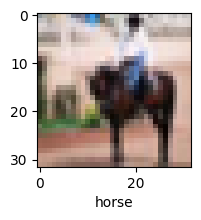

In [79]:
plot_sample(x_train, y_train, 11)

# Normalizing

In [80]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [81]:
x_train.shape

(50000, 32, 32, 3)

In [82]:
x_test.shape

(10000, 32, 32, 3)

# Creating Artifcial Neural Network (ANN)

In [83]:
x_train.shape

(50000, 32, 32, 3)

Adding Layers

In [95]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compiling the Model

In [100]:
ann.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fitting / Running the model

In [101]:
ann.fit(x_train, y_train, epochs=10, batch_size=500)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2098 - loss: 2.1345
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3360 - loss: 1.8567
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.3799 - loss: 1.7426
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4036 - loss: 1.6915
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4222 - loss: 1.6404
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4273 - loss: 1.6210
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4440 - loss: 1.5707
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4467 - loss: 1.5508
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.4569 - loss: 1.5276
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4557 - loss: 1.5158


In [102]:
from sklearn.metrics import classification_report

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(f"Classification report: \n{classification_report(y_test, y_pred_classes)}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification report: 
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1000
           1       0.56      0.61      0.59      1000
           2       0.34      0.25      0.29      1000
           3       0.33      0.37      0.35      1000
           4       0.37      0.42      0.40      1000
           5       0.50      0.21      0.30      1000
           6       0.47      0.57      0.51      1000
           7       0.47      0.57      0.52      1000
           8       0.59      0.58      0.59      1000
           9       0.51      0.54      0.53      1000

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.46      0.46      0.46     10000



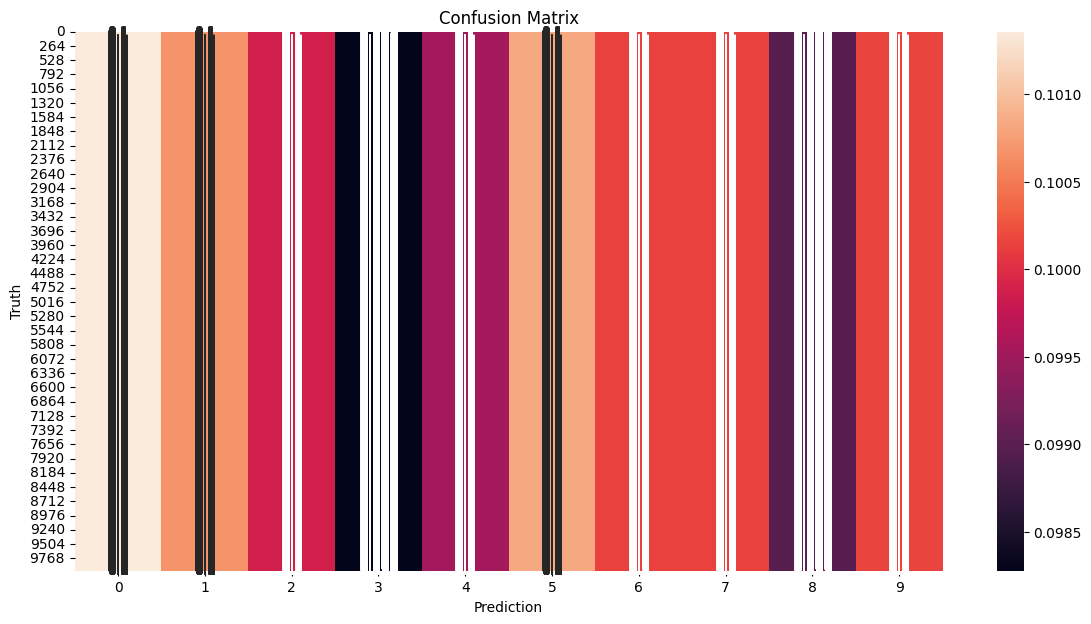

In [88]:
plt.figure(figsize=(14, 7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion Matrix')
plt.show()

# Creating Convolution Neural Networks (CNN)

In [89]:
x_train.shape

(50000, 32, 32, 3)

Model Selection - Using CNN

In [91]:
cnn = models.Sequential([

                         # CNN Layers
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

                        # Deep Layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Compilation

      1. Optimizer = Adam
      2. Loss = Sparse CategoricalCross entropy
      3. Metrics = Accuracy

In [92]:
cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

Fitting / Running the Model

In [94]:
cnn.fit(x_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 118ms/step - accuracy: 0.2792 - loss: 1.9352
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 39s 110ms/step - accuracy: 0.5008 - loss: 1.3758
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 27s 107ms/step - accuracy: 0.5554 - loss: 1.2408
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 55s 163ms/step - accuracy: 0.6023 - loss: 1.1309
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 35s 141ms/step - accuracy: 0.6301 - loss: 1.0572
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 146ms/step - accuracy: 0.6538 - loss: 0.9906
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 163ms/step - accuracy: 0.6758 - loss: 0.9196
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 28s 111ms/step - accuracy: 0.6891 - loss: 0.8879
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 113ms/step - accuracy: 0.7026 - loss: 0.8534
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.7195 - loss: 0.8068


In [103]:
cnn.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6793 - loss: 0.9214


[0.9295825958251953, 0.6779999732971191]

In [104]:
y_pred_cnn = cnn.predict(x_test)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [105]:
from sklearn.metrics import classification_report

print(f"Classification report: \n{classification_report(y_test, y_pred_classes_cnn)}")

Classification report: 
              precision    recall  f1-score   support

           0       0.79      0.62      0.70      1000
           1       0.79      0.78      0.79      1000
           2       0.60      0.51      0.55      1000
           3       0.49      0.53      0.51      1000
           4       0.70      0.54      0.61      1000
           5       0.56      0.59      0.57      1000
           6       0.78      0.77      0.77      1000
           7       0.67      0.80      0.73      1000
           8       0.73      0.83      0.78      1000
           9       0.69      0.82      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [107]:
y_pred_classes_cnn[:5]

[np.int64(3), np.int64(1), np.int64(8), np.int64(8), np.int64(6)]

In [108]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

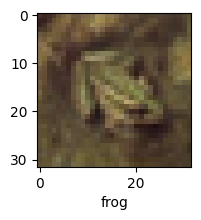

In [115]:
plot_sample(x_test, y_test, 756)

In [116]:
classes[y_pred_classes_cnn[756]]

'frog'